<h1> <center> PANDAS SALES ANALYSIS 

___

<h2> OBJECTIVE

Upon initial inspection of the data, we can start thinking of some questions about it that we would want to answer.

- Which are the Most Selling Products?

- Which is the most preferred Ship Mode?

- Which are the Most Profitable Category and Sub-Category?

___

<h4> IMPORTING REQUIRED LIBRARIES

In [1]:
# Data Manipulation
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

<h4> IMPORTING THE DATASET

In [2]:
# Importing dataset
df = pd.read_csv('superstore_sales.csv')

<H3> DATA AUDIT

You can’t make your data work for you until you know what data you’re talking about.

To get a quick idea of what the data looks like, we can call the head function on the data frame. By default, this returns the top five rows, but it can take in a parameter of how many rows to return.

In [3]:
# First five rows of the dataset
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,1/6/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,1/5/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,1/5/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [4]:
# Last five rows of the dataset
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,12/31/2014,1/4/2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,12/31/2014,1/5/2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,12/31/2014,1/2/2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,12/31/2014,1/6/2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014
51289,CA-2014-156720,12/31/2014,1/4/2015,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3,3,0.2,-0.6048,0.17,Medium,2014


In [5]:
# Shape of the dataset
df.shape

(51290, 21)

In [6]:
# Columns present in the dataset
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

This looks a lot like an Excel spreadsheet, doesn’t it? Under the hood, the data frame is a two-dimensional data structure and each column can have different types. To show that, we can call dtypes attribute on the data frame to see what each column types are.

In [7]:
# A concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

Now we can do further analysis on our data to answer our questions. Before that, we should see if there are any missing values in our data set.To check if there are any missing values in the entire data set we use the isnull function, then see if there are any values.

We’re lucky we have such a nice data set and with no missing values. While we won’t focus on it in this post, a data scientist will spend their time cleaning (or wrangling ) the data. Since we don’t have any missing data, we can start doing further analysis on our data.

In [8]:
# Checking missing values
df.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

Next, we can look at some descriptive statistics of the data frame with the describe method.

This shows some descriptive statistics on the data set. Notice, it only shows the statistics on the numerical columns. From here you can see the following statistics:

- Row count, which aligns to what the shape attribute showed us.
- The mean, or average.
- The standard deviation, or how spread out the data is.
- The minimum and maximum value of each column
- The number of items that fall within the first, second, and third percentiles.

In [9]:
# Generating descriptive statistics summary
df.describe().round()

,quantity,discount,profit,shipping_cost,year
count,51290.0,51290.0,51290.0,51290.0,51290.0
mean,3.0,0.0,29.0,26.0,2013.0
std,2.0,0.0,174.0,57.0,1.0
min,1.0,0.0,-6600.0,0.0,2011.0
25%,2.0,0.0,0.0,3.0,2012.0
50%,3.0,0.0,9.0,8.0,2013.0
75%,5.0,0.0,37.0,24.0,2014.0
max,14.0,1.0,8400.0,934.0,2014.0


<h3> EXPLORATORY DATA ANALYSIS

- <h4> WHICH ARE THE MOST SELLING PRODUCTS?

In [10]:
df.groupby('product_name').sum().sort_values(by=['quantity'],ascending=False).head(10)

,quantity,discount,profit,shipping_cost,year
product_name,,,,,
Staples,876,21.20,2611.0694,731.43,456868
"Cardinal Index Tab, Clear",337,10.32,556.3702,208.35,185186
"Eldon File Cart, Single Width",321,8.82,4238.8887,3970.85,181155
"Rogers File Cart, Single Width",262,16.26,2394.8953,3136.28,169085
"Sanford Pencil Sharpener, Water Color",259,10.66,601.9441,570.38,161008
"Stockwell Paper Clips, Assorted Sizes",253,9.86,251.2878,269.20,130844
"Avery Index Tab, Clear",252,9.01,221.5388,140.51,148956
"Ibico Index Tab, Clear",251,10.71,125.6411,193.26,167045
"Smead File Cart, Single Width",250,13.06,-237.6692,3036.44,154992


In [11]:
# Grouping products by Quantity
best_selling_prods = pd.DataFrame(df.groupby('product_name').sum()['quantity'])

# Sorting the dataframe in descending order
best_selling_prods.sort_values(by=['quantity'], inplace=True, ascending=False)

# Most selling products
best_selling_prods[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


- <h4> WHAT IS THE MOST PREFERRED SHIP MODE?

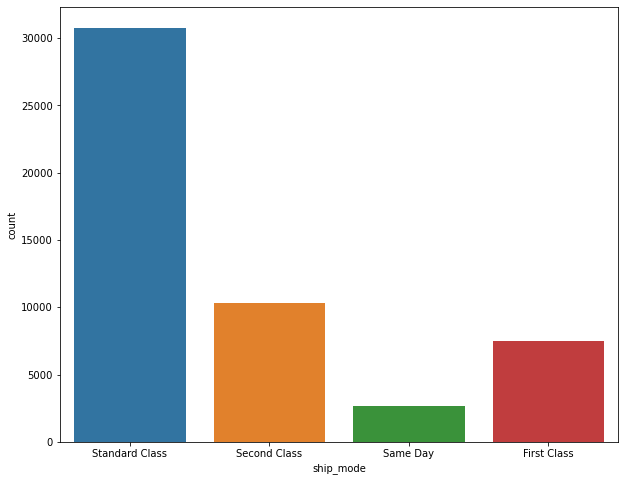

In [12]:
# Setting the figure size
plt.figure(figsize=(10, 8))

# countplot: Show the counts of observations in each categorical bin using bars
sns.countplot(x='ship_mode', data=df)

# Display the figure
plt.show()

- <h4> WHICH ARE THE MOST PROFITABLE CATEGORY AND SUB-CATEGORY?

In [13]:
df.groupby(['category', 'sub_category']).sum().sort_values(['category','profit'], ascending=False)

quantity  discount        profit  shipping_cost  \
category        sub_category                                                    
Technology      Copiers           7454   260.418  258567.54818      159496.34   
                Phones           11870   489.610  216717.00580      184902.66   
                Accessories      10946   370.480  129626.30620       83513.55   
                Machines          4906   252.000   58867.87300       79135.90   
Office Supplies Appliances        6078   248.700  141680.58940      108300.74   
                Storage          16917   700.490  108461.48980      120546.34   
                Binders          21429  1102.480   72449.84600       48181.81   
                Paper            12822   387.300   59207.68270       26661.18   
                Art              16301   573.080   57953.91090       41287.36   
                Envelopes         8380   320.810   29601.11630       18547.74   
                Supplies          8543   310.200   22583.26310       24811.88   
                Labels            9322   313.890   15010.51200        8059.81   
                Fasteners         8390   340.240   11525.42410        9053.50   
Furniture       Bookcases         8310   370.710  161924.41950      155482.16   
                Chairs           12336   560.120  141973.79750      164229.70   
                Furnishings      11225   478.880   46967.42550       40747.04   
                Tables            3083   250.320  -64083.38870       79861.44   

                                  year  
category        sub_category            
Technology      Copiers        4474471  
                Phones         6756800  
                Accessories    6189269  
                Machines       2990958  
Office Supplies Appliances     3532371  
                Storage       10182612  
                Binders       12382700  
                Paper          7121179  
                Art            9828413  
                Envelopes      4901146  
                Supplies       4881018  
                Labels         5245285  
                Fasteners      4870955  
Furniture       Bookcases      4852847  
                Chairs         6911889  
                Furnishings    6380451  
                Tables         1732979

In [14]:
# Grouping products by Category and Sub-Category
cat_subcat = pd.DataFrame(df.groupby(['category', 'sub_category']).sum()['profit'])

# Sorting the values
cat_subcat.sort_values(['category','profit'], ascending=False)

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870